In [1]:
import pandas as pd
import re

In [2]:
accer_df2000=pd.read_csv("data/accre-jobs-2020.csv", nrows=2000 )
#full_df = pd.read_csv('data/accre-jobs-2020.csv', error_bad_lines = False, warn_bad_lines = False)

In [3]:
accer_df2000.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [4]:
accer_df2000.tail()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,0:0,COMPLETED,cn1329
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,0:0,COMPLETED,cn1329
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,0:0,COMPLETED,cn1326
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,0:0,COMPLETED,cn1326
1999,17023702_401,portabella,cinnamon,4096Mn,212.33M,08:00:00,01:13:56,1,1,production,0:0,COMPLETED,cn1326


In [5]:
accer_df2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JOBID      2000 non-null   object
 1   ACCOUNT    2000 non-null   object
 2   USER       2000 non-null   object
 3   REQMEM     2000 non-null   object
 4   USEDMEM    2000 non-null   object
 5   REQTIME    2000 non-null   object
 6   USEDTIME   2000 non-null   object
 7   NODES      2000 non-null   int64 
 8   CPUS       2000 non-null   int64 
 9   PARTITION  2000 non-null   object
 10  EXITCODE   2000 non-null   object
 11  STATE      2000 non-null   object
 12  NODELIST   2000 non-null   object
dtypes: int64(2), object(11)
memory usage: 203.2+ KB


Data Question 2: The Advanced Computing Center for Research and Education

In this data question, you will be analyzing data on jobs run on ACCRE's hardware. You will need to do some data cleaning and preparation and then explore and analyze to answer the following questions.



Data cleaning / formatting

We really only want to look at the "production" partition so rows with other partitions should be removed

Job time is in a format of either d-hh:mm:ss or hh:mm:ss, it needs to be converted to total seconds

Only successful jobs with "0:0" exit codes should be considered for memory use analysis

Memory is reported in terms of Megabytes per node (Mc) or Megabytes per core (Mc), this needs to be uniformly converted to Megabytes per core by dividing by the number of cores per node in a job.

In [6]:
accer_df2000['PARTITION'].value_counts()

production        1990
pascal               4
cgw-cqs1             2
cgw-capra1           2
cgw-dougherty1       1
turing               1
Name: PARTITION, dtype: int64

In [7]:
accer_df2000['EXITCODE'].value_counts()

0:0    1999
0:6       1
Name: EXITCODE, dtype: int64

In [8]:
accer_production=accer_df2000[(accer_df2000['PARTITION']=="production") & ((accer_df2000['EXITCODE']=="0:0"))]

In [9]:
accer_production['PARTITION'].value_counts()

production    1990
Name: PARTITION, dtype: int64

In [10]:
accer_production['EXITCODE']. value_counts()

0:0    1990
Name: EXITCODE, dtype: int64

In [11]:
accer_production


,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,0:0,COMPLETED,cn1329
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,0:0,COMPLETED,cn1329
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,0:0,COMPLETED,cn1326
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,0:0,COMPLETED,cn1326


In [12]:
accer_production['HHMMSS_USED'] = accer_production['USEDTIME'].str.extract('(\d{2}:\d{2}:\d{2})')

<ipython-input-12-40c6c8039387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HHMMSS_USED'] = accer_production['USEDTIME'].str.extract('(\d{2}:\d{2}:\d{2})')


In [13]:
accer_production['DAYS_USED'] = accer_production['USEDTIME'].str.extract('(\d+)-')

<ipython-input-13-f5973496beea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['DAYS_USED'] = accer_production['USEDTIME'].str.extract('(\d+)-')


In [14]:
accer_production

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,HHMMSS_USED,DAYS_USED
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,18:00:28,13
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,14:50:56,12
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,18:00:20,13
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,03:50:32,12
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,18:00:03,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,0:0,COMPLETED,cn1329,01:34:42,NaN
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,0:0,COMPLETED,cn1329,01:30:07,NaN
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,0:0,COMPLETED,cn1326,01:22:29,NaN
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,0:0,COMPLETED,cn1326,01:20:04,NaN


In [15]:
accer_production['HH_USED'] = accer_production['HHMMSS_USED'].str.extract('(\d+):')
accer_production['MM_USED'] = accer_production['HHMMSS_USED'].str.extract(':(\d+):')
accer_production['SS_USED'] = accer_production['HHMMSS_USED'].str.extract(':\d+:(\d+)')

<ipython-input-15-342fa2de8cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HH_USED'] = accer_production['HHMMSS_USED'].str.extract('(\d+):')
<ipython-input-15-342fa2de8cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['MM_USED'] = accer_production['HHMMSS_USED'].str.extract(':(\d+):')
<ipython-input-15-342fa2de8cd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [16]:
accer_production

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,HHMMSS_USED,DAYS_USED,HH_USED,MM_USED,SS_USED
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,18:00:28,13,18,00,28
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,14:50:56,12,14,50,56
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,18:00:20,13,18,00,20
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,03:50:32,12,03,50,32
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,18:00:03,13,18,00,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,0:0,COMPLETED,cn1329,01:34:42,NaN,01,34,42
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,0:0,COMPLETED,cn1329,01:30:07,NaN,01,30,07
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,0:0,COMPLETED,cn1326,01:22:29,NaN,01,22,29
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,0:0,COMPLETED,cn1326,01:20:04,NaN,01,20,04


In [17]:
accer_production['HH_USED'] = accer_production['HH_USED'].astype(int)
accer_production['MM_USED'] = accer_production['MM_USED'].astype(int)
accer_production['SS_USED'] = accer_production['SS_USED'].astype(int)
accer_production['DAYS_USED'] = accer_production['DAYS_USED'].fillna(0).astype(int)


<ipython-input-17-7747bfc97f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HH_USED'] = accer_production['HH_USED'].astype(int)
<ipython-input-17-7747bfc97f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['MM_USED'] = accer_production['MM_USED'].astype(int)
<ipython-input-17-7747bfc97f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [18]:
day_sec_used = accer_production['DAYS_USED'] * 24 * 3600
hour_sec_used = accer_production['HH_USED']*3600
minute_sec_used = accer_production['MM_USED']*60

In [19]:
accer_production['TOTAL_SEC_USED'] = day_sec_used + hour_sec_used + minute_sec_used + accer_production['SS_USED']

<ipython-input-19-411e9a6a40e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['TOTAL_SEC_USED'] = day_sec_used + hour_sec_used + minute_sec_used + accer_production['SS_USED']


In [20]:
accer_production['HHMMSS_REQ'] = accer_production['REQTIME'].str.extract('(\d{2}:\d{2}:\d{2})')

<ipython-input-20-423ffee273da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HHMMSS_REQ'] = accer_production['REQTIME'].str.extract('(\d{2}:\d{2}:\d{2})')


In [21]:
accer_production['DAYS_REQ'] = accer_production['REQTIME'].str.extract('(\d+)-')

<ipython-input-21-5bdadda7d1d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['DAYS_REQ'] = accer_production['REQTIME'].str.extract('(\d+)-')


In [22]:
accer_production['HH_REQ'] = accer_production['HHMMSS_REQ'].str.extract('(\d+):')
accer_production['MM_REQ'] = accer_production['HHMMSS_REQ'].str.extract(':(\d+):')
accer_production['SS_REQ'] = accer_production['HHMMSS_REQ'].str.extract(':\d+:(\d+)')

<ipython-input-22-b16cf38ee4de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HH_REQ'] = accer_production['HHMMSS_REQ'].str.extract('(\d+):')
<ipython-input-22-b16cf38ee4de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['MM_REQ'] = accer_production['HHMMSS_REQ'].str.extract(':(\d+):')
<ipython-input-22-b16cf38ee4de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [23]:
accer_production['HH_REQ'] = accer_production['HH_REQ'].astype(int)
accer_production['MM_REQ'] = accer_production['MM_REQ'].astype(int)
accer_production['SS_REQ'] = accer_production['SS_REQ'].astype(int)
accer_production['DAYS_REQ'] = accer_production['DAYS_REQ'].fillna(0).astype(int)

<ipython-input-23-005c0f9cf5ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['HH_REQ'] = accer_production['HH_REQ'].astype(int)
<ipython-input-23-005c0f9cf5ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['MM_REQ'] = accer_production['MM_REQ'].astype(int)
<ipython-input-23-005c0f9cf5ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
day_sec_req = accer_production['DAYS_REQ'] * 24 * 3600
hour_sec_req = accer_production['HH_REQ']*3600
minute_sec_req = accer_production['MM_REQ']*60

In [25]:
accer_production['TOTAL_SEC_REQ'] = day_sec_req + hour_sec_req + minute_sec_req + accer_production['SS_REQ']

<ipython-input-25-fb9f21ab98b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['TOTAL_SEC_REQ'] = day_sec_req + hour_sec_req + minute_sec_req + accer_production['SS_REQ']


In [26]:
accer_production['REQMEM'].value_counts()

16384Mn     1153
8192Mn       400
1024Mn       192
4096Mn       167
122880Mn      30
20480Mn       27
65536Mn       10
153600Mn       3
235520Mn       2
4096Mc         2
102400Mn       1
131072Mn       1
247808Mn       1
77824Mn        1
Name: REQMEM, dtype: int64

In [27]:
accer_production['mem_req_type']=accer_production['REQMEM'].str.extract(r'\d+(\w+)') 

<ipython-input-27-b129ce27e1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_req_type']=accer_production['REQMEM'].str.extract(r'\d+(\w+)')


In [28]:
accer_production['mem_req_amnt']=accer_production['REQMEM'].str.extract(r'(\d+)\w+')

<ipython-input-28-3c304708607e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_req_amnt']=accer_production['REQMEM'].str.extract(r'(\d+)\w+')


In [29]:
accer_production['mem_req_type'].value_counts()

Mn    1988
Mc       2
Name: mem_req_type, dtype: int64

In [30]:
accer_production

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,...,SS_USED,TOTAL_SEC_USED,HHMMSS_REQ,DAYS_REQ,HH_REQ,MM_REQ,SS_REQ,TOTAL_SEC_REQ,mem_req_type,mem_req_amnt
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,28,1188028,18:00:00,13,18,0,0,1188000,Mn,122880
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,56,1090256,18:00:00,13,18,0,0,1188000,Mn,122880
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,20,1188020,18:00:00,13,18,0,0,1188000,Mn,122880
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,32,1050632,18:00:00,13,18,0,0,1188000,Mn,122880
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,3,1188003,18:00:00,13,18,0,0,1188000,Mn,122880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,...,42,5682,08:00:00,0,8,0,0,28800,Mn,4096
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,...,7,5407,08:00:00,0,8,0,0,28800,Mn,4096
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,...,29,4949,08:00:00,0,8,0,0,28800,Mn,4096
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,...,4,4804,08:00:00,0,8,0,0,28800,Mn,4096


In [31]:
accer_production['USEDMEM'].value_counts()

2.12M       112
2.13M        80
213.09M       4
629.95M       4
586.04M       4
           ... 
1228.11M      1
1226.94M      1
1239.16M      1
832.86M       1
878.18M       1
Name: USEDMEM, Length: 1628, dtype: int64

In [151]:
accer_production['mem_used_type']=accer_production['USEDMEM'].str.extract(r'\d+\.*\d*(\w{1})') 

<ipython-input-151-3faa7fedde31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_used_type']=accer_production['USEDMEM'].str.extract(r'\d+\.*\d*(\w{1})')


In [149]:
accer_production['mem_used_amnt']=accer_production['USEDMEM'].str.extract(r'(\d+\.*\d*)\w+')

<ipython-input-149-60207a7e0aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_used_amnt']=accer_production['USEDMEM'].str.extract(r'(\d+\.*\d*)\w+')


In [152]:
accer_production['mem_used_type'].value_counts()

M    1990
Name: mem_used_type, dtype: int64

In [153]:
accer_production

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,...,HHMMSS_REQ,DAYS_REQ,HH_REQ,MM_REQ,SS_REQ,TOTAL_SEC_REQ,mem_req_type,mem_req_amnt,mem_used_type,mem_used_amnt
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,18:00:00,13,18,0,0,1188000,Mn,122880.0,M,65973.49
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,18:00:00,13,18,0,0,1188000,Mn,122880.0,M,67181.12
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,18:00:00,13,18,0,0,1188000,Mn,122880.0,M,69111.86
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,18:00:00,13,18,0,0,1188000,Mn,122880.0,M,65317.33
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,18:00:00,13,18,0,0,1188000,Mn,122880.0,M,65876.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17023702_397,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:34:42,1,1,production,...,08:00:00,0,8,0,0,28800,Mn,4096.0,M,213.09
1996,17023702_398,portabella,cinnamon,4096Mn,213.09M,08:00:00,01:30:07,1,1,production,...,08:00:00,0,8,0,0,28800,Mn,4096.0,M,213.09
1997,17023702_399,portabella,cinnamon,4096Mn,212.91M,08:00:00,01:22:29,1,1,production,...,08:00:00,0,8,0,0,28800,Mn,4096.0,M,212.91
1998,17023702_400,portabella,cinnamon,4096Mn,211.71M,08:00:00,01:20:04,1,1,production,...,08:00:00,0,8,0,0,28800,Mn,4096.0,M,211.71


In [154]:
accer_production['mem_req_amnt']=accer_production['mem_req_amnt'].astype(float)
accer_production['mem_used_amnt']=accer_production['mem_used_amnt'].astype(float)

<ipython-input-154-d38b8c2c8723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_req_amnt']=accer_production['mem_req_amnt'].astype(float)
<ipython-input-154-d38b8c2c8723>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_used_amnt']=accer_production['mem_used_amnt'].astype(float)


In [155]:
accer_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOBID           1990 non-null   object 
 1   ACCOUNT         1990 non-null   object 
 2   USER            1990 non-null   object 
 3   REQMEM          1990 non-null   object 
 4   USEDMEM         1990 non-null   object 
 5   REQTIME         1990 non-null   object 
 6   USEDTIME        1990 non-null   object 
 7   NODES           1990 non-null   int64  
 8   CPUS            1990 non-null   int64  
 9   PARTITION       1990 non-null   object 
 10  EXITCODE        1990 non-null   object 
 11  STATE           1990 non-null   object 
 12  NODELIST        1990 non-null   object 
 13  HHMMSS_USED     1990 non-null   object 
 14  DAYS_USED       1990 non-null   int64  
 15  HH_USED         1990 non-null   int64  
 16  MM_USED         1990 non-null   int64  
 17  SS_USED         1990 non-null   i

In [156]:
accer_production['mem_used_type'].isna().sum()

0

In [157]:
accer_production['mem_used_amnt'].isna().sum()

0

In [160]:
accer_production['mem_req_amnt'].isna().sum()

0

In [162]:
accer_production.loc[accer_production['mem_req_type']=='Mn','mem_req_percpu'] = accer_production['NODES']*accer_production['mem_req_amnt']/accer_production['CPUS']
accer_production.loc[accer_production['mem_req_type']=='Mc','mem_req_percpu'] = accer_production['mem_req_amnt']
accer_production['mem_used_percpu'] = accer_production['mem_used_amnt']*accer_production['NODES']/accer_production['CPUS']

/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-162-ced57359f110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [165]:
accer_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JOBID            1990 non-null   object 
 1   ACCOUNT          1990 non-null   object 
 2   USER             1990 non-null   object 
 3   REQMEM           1990 non-null   object 
 4   USEDMEM          1990 non-null   object 
 5   REQTIME          1990 non-null   object 
 6   USEDTIME         1990 non-null   object 
 7   NODES            1990 non-null   int64  
 8   CPUS             1990 non-null   int64  
 9   PARTITION        1990 non-null   object 
 10  EXITCODE         1990 non-null   object 
 11  STATE            1990 non-null   object 
 12  NODELIST         1990 non-null   object 
 13  HHMMSS_USED      1990 non-null   object 
 14  DAYS_USED        1990 non-null   int64  
 15  HH_USED          1990 non-null   int64  
 16  MM_USED          1990 non-null   int64  
 17  SS_USED       

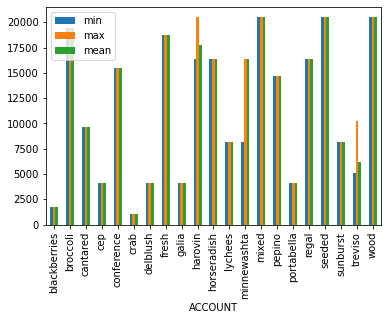

In [185]:
accer_production.groupby('ACCOUNT')['mem_req_percpu'].agg(['min', 'max', 'mean']).plot(kind='bar');

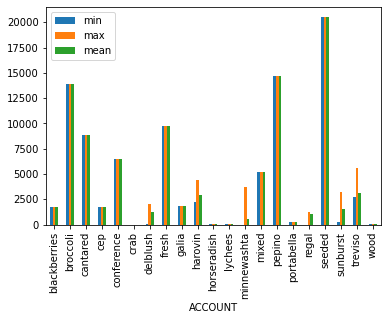

In [180]:
accer_production.groupby('ACCOUNT')['mem_used_percpu'].agg(['min', 'max', 'mean']).plot(kind='bar');

In [183]:
accer_production['mem_percent_used']=100* accer_production['mem_used_percpu']/accer_production['mem_req_percpu']

<ipython-input-183-5fbbe9c89b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accer_production['mem_percent_used']=100* accer_production['mem_used_percpu']/accer_production['mem_req_percpu']


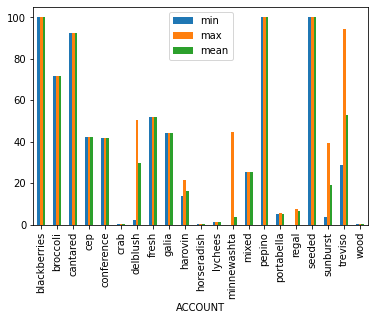

In [184]:
accer_production.groupby('ACCOUNT')['mem_percent_used'].agg(['min', 'max', 'mean']).plot(kind='bar');